## Deseq2 analysis
This jupyter notebook contains information on how I got Deseq2 installed plus other information.

This is the command to install Deseq2 (via conda install). Make a new conda environment (mine was called deseq2) to install this deseq2 in an isolated environment.

"conda install -c bioconda bioconductor-deseq2"  (run without quotations)

In [1]:
#BiocManager::install("DESeq2")
library("DESeq2")
package.version("DESeq2")
#Version says 1.22.1

#activating phyloseq
#BiocManager::install("phyloseq")
library("phyloseq")
package.version("phyloseq")
#Version says 1.26.0

library("ggplot2")
packageVersion("ggplot2")
#Package version of ggplot2 is 3.1.0

library("biomformat")
packageVersion("biomformat")
#Package version of biomformat is 1.10.0

library("vegan")
packageVersion('vegan')
#Package version of vegen is 2.5.3

library("grid")
packageVersion('grid')
#Package version of grid is 3.5.1

library(magrittr)
packageVersion('magrittr')
#Package version of magrittr is 1.5

library(dplyr)
packageVersion("dplyr")
#Package version of dplyr is 0.7.8

library(plyr)
packageVersion("plyr")
#Package version of plyr is 1.8.4

library(broom)
packageVersion("broom")
#Package version of broom is 0.5.1

library('stringr')
packageVersion("stringr")
#Package version of stringr is 1.3.1

library('knitr')
packageVersion('knitr')
#Package version of knitr is 1.21

package.version("BiocManager")
#Version says 1.30.4

R.version
#R version is 3.5.1

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min


Attaching packag

[1] "1.18.1"


Attaching package: ‘phyloseq’

The following object is masked from ‘package:SummarizedExperiment’:

    distance

The following object is masked from ‘package:Biobase’:

    sampleNames

The following object is masked from ‘package:GenomicRanges’:

    distance

The following object is masked from ‘package:IRanges’:

    distance



[1] "1.22.3"

[1] ‘3.2.1’

[1] ‘1.6.0’

Loading required package: permute
Loading required package: lattice
This is vegan 2.5-6


[1] ‘2.5.6’

[1] ‘3.4.1’

[1] ‘1.5’


Attaching package: ‘dplyr’

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union

The following object is masked from ‘package:GenomeInfoDb’:

    intersect

The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union

The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



[1] ‘0.8.3’

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:matrixStats’:

    count

The following object is masked from ‘package:IRanges’:

    desc

The following object is masked from ‘package:S4Vectors’:

    rename



[1] ‘1.8.4’

[1] ‘0.5.2’

[1] ‘1.4.0’

[1] ‘1.26’

[1] "1.30.10"

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          4.1                         
year           2017                        
month          06                          
day            30                          
svn rev        72865                       
language       R                           
version.string R version 3.4.1 (2017-06-30)
nickname       Single Candle               

## Importing all files and making sure that they are compatibale with the analysis (Pre-Analysis)

In [1]:
#Importing Qiime1 data
biom_all_mice <- import_biom(BIOMfilename = "otu_table_filtered_s24-json.biom"
            ,treefilename = "rep_set.tre"
            ,parseFunction = parse_taxonomy_greengenes)

#Importing mapping file
mapping_file <- import_qiime_sample_data(mapfilename = "pcos_mapping.tsv")

#Merging both mapping file phyloseq object and biom file phyloseq data
phy_main <- merge_phyloseq(biom_all_mice, mapping_file)

rank_names(phy_main)

In [3]:
biom_all_mice

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2517 taxa and 119 samples ]
tax_table()   Taxonomy Table:    [ 2517 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2517 tips and 2516 internal nodes ]

In [4]:
#nsamples() shows the number of samples
print ('Number of Samples in our Biom Table')
nsamples(phy_main)

#ntaxa() shows number of unique OTUs there are 
print ('Number of OTUs we have.')
ntaxa(phy_main)

#sample_sums() shows summary statistics of the sampling depth (sequences per sample)
print ('Summary stats of sequencing depth.')
depths <- sample_sums(phy_main)
summary(depths)

#sort() sorts the phyloseq object. use this to find the sample with the lowest sequences
print("Sample with the lowest amount of sequences")
head(sort(sample_sums(phy_main)),1)

#rank_names() shows the taxa ranks of phylo obj
print("Taxa ranks")
rank_names(phy_main)

#Name of phylo obj shows the components of the obj
print("components of phylo object")
phy_main

#Showing the actual taxa of phy obj
print("First 10 rep taxa from phy obj")
taxtable=tax_table(phy_main)
taxtable[1:10]

[1] "Number of Samples in our Biom Table"


[1] 119

[1] "Number of OTUs we have."


[1] 2517

[1] "Summary stats of sequencing depth."


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7450   17780   23044   23707   27578   54131 

[1] "Sample with the lowest amount of sequences"


B06L4H 
  7450

[1] "Taxa ranks"


[1] "Kingdom" "Phylum"  "Class"   "Order"   "Family"  "Genus"   "Species"
[8] "Rank1"

[1] "components of phylo object"


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2517 taxa and 119 samples ]
sample_data() Sample Data:       [ 119 samples by 12 sample variables ]
tax_table()   Taxonomy Table:    [ 2517 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2517 tips and 2516 internal nodes ]

[1] "First 10 rep taxa from phy obj"


,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
denovo305528,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo484720,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo10822,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo555690,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo478127,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo435229,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo516236,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo105186,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo291838,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo346097,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA


In [10]:
phy.pt = subset_samples(phy_main, Time != '0') # removing time 0
phy.pt.time2 = subset_samples(phy.pt, Time != '1' & Time!='3' & Time!='4' & Time!='5') 
phy.pt.time5 = subset_samples(phy.pt, Time != '1' & Time!='3' & Time!='4' & Time!='2') 
phy.pt.time1 = subset_samples(phy.pt, Time != '2' & Time!='3' & Time!='4' & Time!='5') 
phy.pt.time3 = subset_samples(phy.pt, Time != '1' & Time!='5' & Time!='4' & Time!='2')
phy.pt.time4 = subset_samples(phy.pt, Time != '1' & Time!='3' & Time!='2' & Time!='5')

In [11]:
unique(sample_data(phy.pt.time4)$Treat)
unique(sample_data(phy.pt.time4)$Time)

[1] L P
Levels: L P

[1] 4

## Make Deseq2 object

In [14]:
deseq2.PL <- phyloseq_to_deseq2(phy.pt, ~ Treat)
deseq2.PL.time2 <- phyloseq_to_deseq2(phy.pt.time2, ~ Treat)
deseq2.PL.time5 <- phyloseq_to_deseq2(phy.pt.time5, ~ Treat)
deseq2.PL.time1 <- phyloseq_to_deseq2(phy.pt.time1, ~ Treat)
deseq2.PL.time3 <- phyloseq_to_deseq2(phy.pt.time3, ~ Treat)
deseq2.PL.time4 <- phyloseq_to_deseq2(phy.pt.time4, ~ Treat)

converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode


# Placebo Vs Letrozole

In [17]:
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(deseq2.PL), 1, gm_mean)
deseq2.PL = estimateSizeFactors(deseq2.PL, geoMeans = geoMeans)
deseq2.PL = DESeq(deseq2.PL, fitType="local")

res = results(deseq2.PL)
res = res[order(res$padj, na.last=NA), ]

sigtab = res
#sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(phy.pt)[rownames(sigtab), ], "matrix"))
sigtab
head(sigtab, contrasts=list("Placebo","Letrozole"))
write.csv(sigtab, "pvl_all.csv", row.names = TRUE)
res

using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 51 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo17716,2.740319,-4.0297654,0.5545724,-7.266437,3.690937e-13,6.588322e-10,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo298519,43.255779,-2.8382117,0.4350964,-6.523179,6.883260e-11,6.143310e-08,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo65513,3.343606,-3.9936808,0.6406257,-6.234031,4.545822e-10,2.704764e-07,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo18922,3.559890,-2.8072743,0.4563529,-6.151543,7.673284e-10,3.424203e-07,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo209047,579.549884,1.3038989,0.2211350,5.896392,3.715359e-09,1.326383e-06,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo179087,52.275220,-2.0829481,0.3876834,-5.372807,7.752019e-08,1.980581e-05,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcus,NA,NA
denovo349383,53.632606,-2.1164906,0.3939519,-5.372460,7.766986e-08,1.980581e-05,Bacteria,Firmicutes,Erysipelotrichi,Erysipelotrichales,Erysipelotrichaceae,Allobaculum,NA,NA
denovo105657,9.240791,1.7151211,0.3225852,5.316801,1.056076e-07,2.356370e-05,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NA,NA,NA
denovo178389,3.050385,-2.3980243,0.4538643,-5.283572,1.266894e-07,2.512673e-05,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo17716,2.740319,-4.029765,0.5545724,-7.266437,3.690937e-13,6.588322e-10,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo298519,43.255779,-2.838212,0.4350964,-6.523179,6.883260e-11,6.143310e-08,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo65513,3.343606,-3.993681,0.6406257,-6.234031,4.545822e-10,2.704764e-07,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo18922,3.559890,-2.807274,0.4563529,-6.151543,7.673284e-10,3.424203e-07,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo209047,579.549884,1.303899,0.2211350,5.896392,3.715359e-09,1.326383e-06,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,S24-7,NA,NA,NA
denovo179087,52.275220,-2.082948,0.3876834,-5.372807,7.752019e-08,1.980581e-05,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcus,NA,NA


log2 fold change (MLE): Treat P vs L 
Wald test p-value: Treat P vs L 
DataFrame with 1785 rows and 6 columns
               baseMean log2FoldChange     lfcSE          stat       pvalue
              <numeric>      <numeric> <numeric>     <numeric>    <numeric>
denovo17716    2.740319      -4.029765 0.5545724     -7.266437 3.690937e-13
denovo298519  43.255779      -2.838212 0.4350964     -6.523179 6.883260e-11
denovo65513    3.343606      -3.993681 0.6406257     -6.234031 4.545822e-10
denovo18922    3.559890      -2.807274 0.4563529     -6.151543 7.673284e-10
denovo209047 579.549884       1.303899 0.2211350      5.896392 3.715359e-09
...                 ...            ...       ...           ...          ...
denovo123994   2.193997   1.833591e-03 0.2791909  6.567518e-03    0.9947599
denovo365972   1.006839   8.807442e-05 0.3722181  2.366205e-04    0.9998112
denovo350874  15.700466   7.214295e-05 0.1757969  4.103766e-04    0.9996726
denovo378428   1.339666  -5.304347e-05 0.2985300 -1.77

null device 
          1

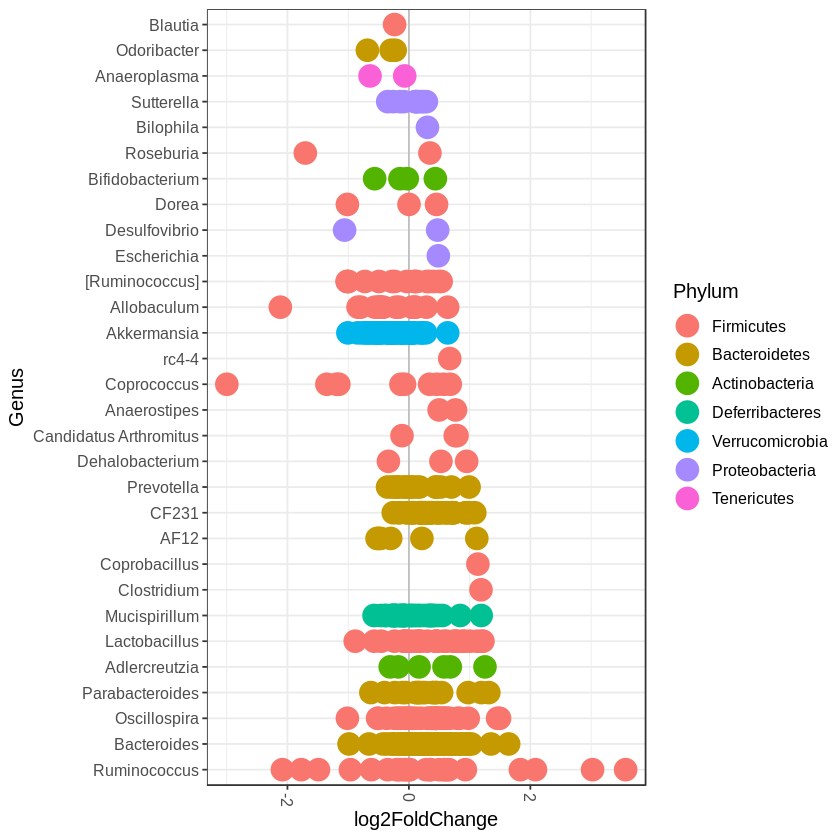

In [18]:
library("ggplot2")
#pdf('BA_Cutoff_PvsCoL_DESEQ.pdf', width=32, height=20)
#jpeg("rplot.jpg", width = 1000, height = 800)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) + 
  theme(text= element_text(size=12),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
dev.off()

# Time 1

In [19]:
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(deseq2.PL.time1), 1, gm_mean)
deseq2.PL.time1 = estimateSizeFactors(deseq2.PL.time1, geoMeans = geoMeans)
deseq2.PL.time1 = DESeq(deseq2.PL.time1, fitType="local")

res = results(deseq2.PL.time1)
res = res[order(res$padj, na.last=NA), ]

sigtab = res
#sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(phy.pt.time1)[rownames(sigtab), ], "matrix"))
sigtab
head(sigtab, contrasts=list("Placebo","Letrozole"))
write.csv(sigtab, "pvl_time1.csv", row.names = TRUE)
res

using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 65 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo179087,46.8682635,-3.52292338,0.7410405,-4.7540230,1.994083e-06,0.005013125,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcus,NA,NA
denovo152861,11.9875775,-3.20608467,0.7673034,-4.1783793,2.935937e-05,0.024603153,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo100731,16.0139313,-3.75782339,0.8908441,-4.2182728,2.461808e-05,0.024603153,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo484653,19.2487191,-3.32803651,0.8444012,-3.9412975,8.104203e-05,0.050934919,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo217968,11.7103525,3.97511931,1.1106807,3.5789936,3.449199e-04,0.173425714,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NA,NA,NA
denovo376509,4.3370131,-4.30088397,1.2259311,-3.5082593,4.510493e-04,0.174012732,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo431968,6.1848373,3.00875559,0.8623126,3.4891703,4.845223e-04,0.174012732,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo337437,7.3723459,-2.63743094,0.8202015,-3.2155891,1.301771e-03,0.409081457,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo174953,1.8695996,-3.32468178,1.0968650,-3.0310766,2.436834e-03,0.680689039,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Coprococcus,NA,NA


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo179087,46.868263,-3.522923,0.7410405,-4.754023,1.994083e-06,0.005013125,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcus,NA,NA
denovo152861,11.987578,-3.206085,0.7673034,-4.178379,2.935937e-05,0.024603153,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo100731,16.013931,-3.757823,0.8908441,-4.218273,2.461808e-05,0.024603153,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo484653,19.248719,-3.328037,0.8444012,-3.941298,8.104203e-05,0.050934919,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo217968,11.710353,3.975119,1.1106807,3.578994,3.449199e-04,0.173425714,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NA,NA,NA
denovo376509,4.337013,-4.300884,1.2259311,-3.508259,4.510493e-04,0.174012732,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA


log2 fold change (MLE): Treat P vs L 
Wald test p-value: Treat P vs L 
DataFrame with 2514 rows and 6 columns
              baseMean log2FoldChange     lfcSE         stat       pvalue
             <numeric>      <numeric> <numeric>    <numeric>    <numeric>
denovo179087  46.86826      -3.522923 0.7410405    -4.754023 1.994083e-06
denovo152861  11.98758      -3.206085 0.7673034    -4.178379 2.935937e-05
denovo100731  16.01393      -3.757823 0.8908441    -4.218273 2.461808e-05
denovo484653  19.24872      -3.328037 0.8444012    -3.941298 8.104203e-05
denovo217968  11.71035       3.975119 1.1106807     3.578994 3.449199e-04
...                ...            ...       ...          ...          ...
denovo428036 0.6788334    0.006147282 1.0374994  0.005925094    0.9952725
denovo400470 2.3637511    0.005590670 1.1734114  0.004764458    0.9961985
denovo394144 1.0429443    0.002995306 0.8587781  0.003487870    0.9972171
denovo133870 0.9524887   -0.003067721 0.7807210 -0.003929344    0.9968648
de

null device 
          1

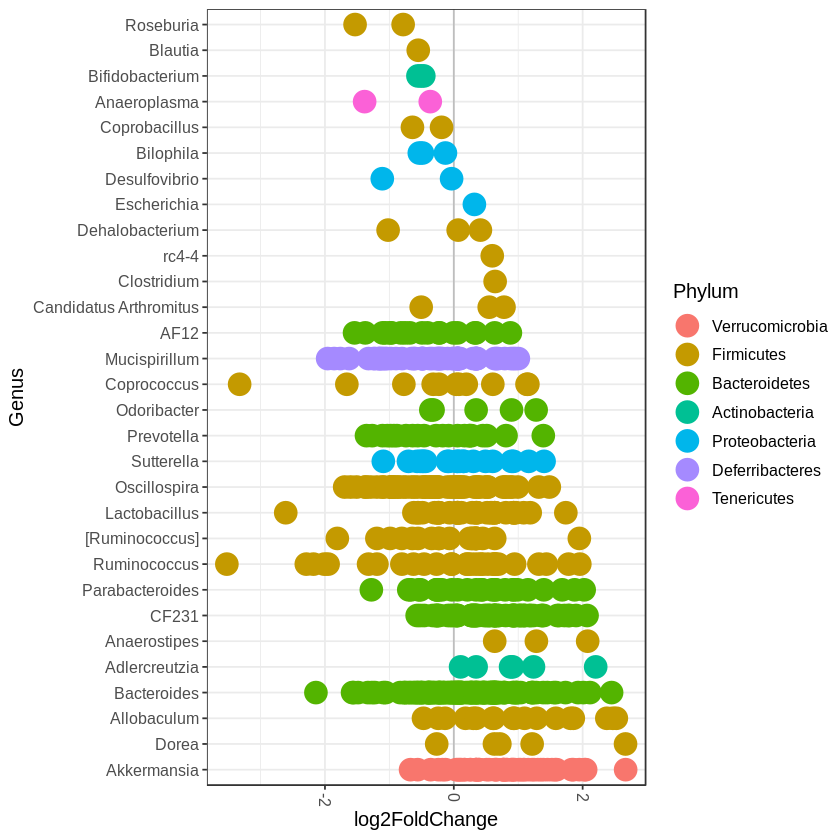

In [20]:
library("ggplot2")
#pdf('BA_Cutoff_PvsCoL_DESEQ.pdf', width=32, height=20)
#jpeg("rplot.jpg", width = 1000, height = 800)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) + 
  theme(text= element_text(size=12),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
dev.off()

# Time 2

In [21]:
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(deseq2.PL.time2), 1, gm_mean)
deseq2.PL.time2 = estimateSizeFactors(deseq2.PL.time2, geoMeans = geoMeans)
deseq2.PL.time2 = DESeq(deseq2.PL.time2, fitType="local")

res = results(deseq2.PL.time2)
res = res[order(res$padj, na.last=NA), ]

sigtab = res
#sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(phy.pt.time2)[rownames(sigtab), ], "matrix"))
sigtab
head(sigtab, contrasts=list("Placebo","Letrozole"))
write.csv(sigtab, "pvl_time2.csv", row.names = TRUE)
res

using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 46 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo55677,106.245860,-6.0730741,0.7037022,-8.630176,6.125757e-18,1.672332e-15,Bacteria,Actinobacteria,Actinobacteria,Bifidobacteriales,Bifidobacteriaceae,Bifidobacterium,NA,NA
denovo431968,11.160392,-3.4553169,0.9053375,-3.816606,1.352998e-04,9.234209e-03,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo182465,7.314228,2.9014163,0.7400990,3.920308,8.843572e-05,9.234209e-03,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,NA,NA,NA
denovo349383,71.637188,-3.0219594,0.7816280,-3.866237,1.105274e-04,9.234209e-03,Bacteria,Firmicutes,Erysipelotrichi,Erysipelotrichales,Erysipelotrichaceae,Allobaculum,NA,NA
denovo177937,28.251602,-3.3541833,0.9413798,-3.563050,3.665709e-04,2.001477e-02,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NA,NA
denovo51301,6.230371,-1.7000377,0.4950184,-3.434292,5.941034e-04,2.312306e-02,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo227121,7.504545,-2.6239776,0.7721019,-3.398486,6.775987e-04,2.312306e-02,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo551376,9.834233,-1.5701832,0.4568522,-3.436961,5.882801e-04,2.312306e-02,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Coprococcus,NA,NA
denovo321304,124.223086,-2.6000566,0.7826734,-3.322020,8.936839e-04,2.710841e-02,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo55677,106.245860,-6.073074,0.7037022,-8.630176,6.125757e-18,1.672332e-15,Bacteria,Actinobacteria,Actinobacteria,Bifidobacteriales,Bifidobacteriaceae,Bifidobacterium,NA,NA
denovo431968,11.160392,-3.455317,0.9053375,-3.816606,1.352998e-04,9.234209e-03,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo182465,7.314228,2.901416,0.7400990,3.920308,8.843572e-05,9.234209e-03,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,NA,NA,NA
denovo349383,71.637188,-3.021959,0.7816280,-3.866237,1.105274e-04,9.234209e-03,Bacteria,Firmicutes,Erysipelotrichi,Erysipelotrichales,Erysipelotrichaceae,Allobaculum,NA,NA
denovo177937,28.251602,-3.354183,0.9413798,-3.563050,3.665709e-04,2.001477e-02,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NA,NA
denovo51301,6.230371,-1.700038,0.4950184,-3.434292,5.941034e-04,2.312306e-02,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA


log2 fold change (MLE): Treat P vs L 
Wald test p-value: Treat P vs L 
DataFrame with 273 rows and 6 columns
                baseMean log2FoldChange     lfcSE          stat       pvalue
               <numeric>      <numeric> <numeric>     <numeric>    <numeric>
denovo55677   106.245860      -6.073074 0.7037022     -8.630176 6.125757e-18
denovo431968   11.160392      -3.455317 0.9053375     -3.816606 1.352998e-04
denovo182465    7.314228       2.901416 0.7400990      3.920308 8.843572e-05
denovo349383   71.637188      -3.021959 0.7816280     -3.866237 1.105274e-04
denovo177937   28.251602      -3.354183 0.9413798     -3.563050 3.665709e-04
...                  ...            ...       ...           ...          ...
denovo467317    4.736859   0.0301996955 0.9387214  0.0321710950    0.9743356
denovo548419    8.932479   0.0090772847 0.3737120  0.0242895160    0.9806217
denovo102347    8.351486  -0.0032145895 0.4991116 -0.0064406224    0.9948612
denovo202271   27.675447   0.0003091059 0.37

null device 
          1

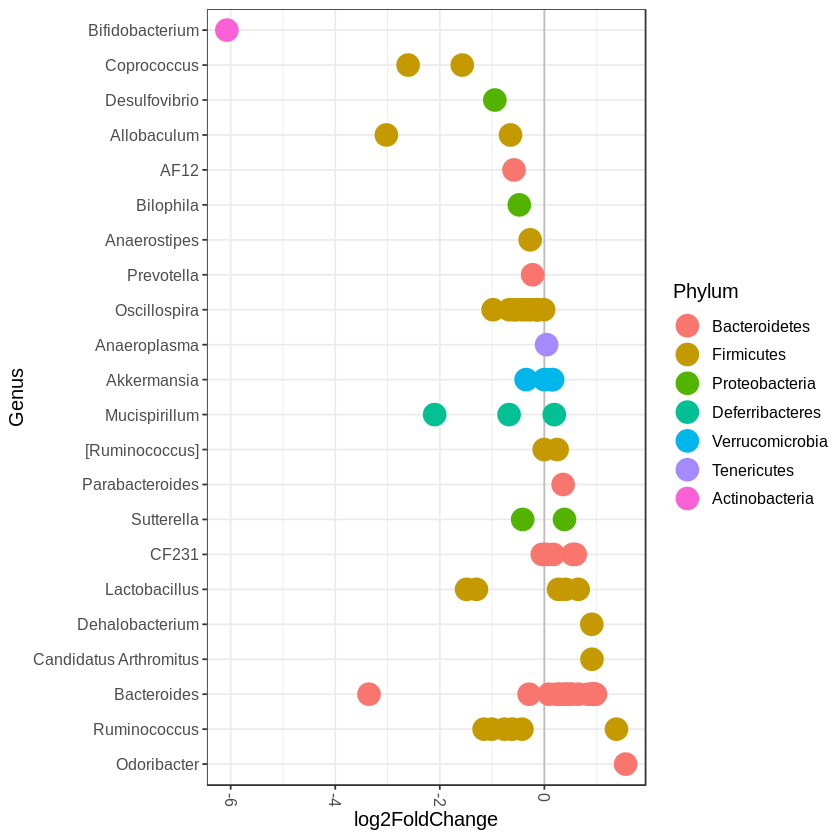

In [22]:
library("ggplot2")
#pdf('BA_Cutoff_PvsCoL_DESEQ.pdf', width=32, height=20)
#jpeg("rplot.jpg", width = 1000, height = 800)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) + 
  theme(text= element_text(size=12),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
dev.off()

# Time 3

In [23]:
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(deseq2.PL.time3), 1, gm_mean)
deseq2.PL.time3 = estimateSizeFactors(deseq2.PL.time3, geoMeans = geoMeans)
deseq2.PL.time3 = DESeq(deseq2.PL.time3, fitType="local")

res = results(deseq2.PL.time3)
res = res[order(res$padj, na.last=NA), ]

sigtab = res
#sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(phy.pt.time3)[rownames(sigtab), ], "matrix"))
sigtab
head(sigtab, contrasts=list("Placebo","Letrozole"))
write.csv(sigtab, "pvl_time3.csv", row.names = TRUE)
res

using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 39 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo78833,1173.872415,3.835431,0.7540666,5.086329,3.650598e-07,0.0003840429,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo205876,29.199299,3.415115,0.7825002,4.364364,1.274932e-05,0.0029428173,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo182465,14.107370,3.310320,0.7620321,4.344069,1.398677e-05,0.0029428173,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,NA,NA,NA
denovo90852,670.511380,1.985987,0.4391961,4.521869,6.129602e-06,0.0029428173,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo455547,9.725547,2.063429,0.4700430,4.389872,1.134175e-05,0.0029428173,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo172497,39.984325,2.955894,0.6873715,4.300286,1.705779e-05,0.0029907993,Bacteria,Actinobacteria,Coriobacteriia,Coriobacteriales,Coriobacteriaceae,NA,NA,NA
denovo125437,4.098847,2.336218,0.5478085,4.264662,2.002051e-05,0.0030087962,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NA,NA
denovo484653,45.642915,-3.121614,0.7395931,-4.220718,2.435254e-05,0.0032023587,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo17716,2.758429,-4.025699,0.9766417,-4.121981,3.756277e-05,0.0040234838,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo78833,1173.872415,3.835431,0.7540666,5.086329,3.650598e-07,0.0003840429,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo205876,29.199299,3.415115,0.7825002,4.364364,1.274932e-05,0.0029428173,Bacteria,Firmicutes,Bacilli,Lactobacillales,Lactobacillaceae,Lactobacillus,NA,NA
denovo182465,14.107370,3.310320,0.7620321,4.344069,1.398677e-05,0.0029428173,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,NA,NA,NA
denovo90852,670.511380,1.985987,0.4391961,4.521869,6.129602e-06,0.0029428173,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo455547,9.725547,2.063429,0.4700430,4.389872,1.134175e-05,0.0029428173,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,NA,NA,NA,NA
denovo172497,39.984325,2.955894,0.6873715,4.300286,1.705779e-05,0.0029907993,Bacteria,Actinobacteria,Coriobacteriia,Coriobacteriales,Coriobacteriaceae,NA,NA,NA


log2 fold change (MLE): Treat P vs L 
Wald test p-value: Treat P vs L 
DataFrame with 1052 rows and 6 columns
                baseMean log2FoldChange     lfcSE         stat       pvalue
               <numeric>      <numeric> <numeric>    <numeric>    <numeric>
denovo78833  1173.872415       3.835431 0.7540666     5.086329 3.650598e-07
denovo205876   29.199299       3.415115 0.7825002     4.364364 1.274932e-05
denovo182465   14.107370       3.310320 0.7620321     4.344069 1.398677e-05
denovo90852   670.511380       1.985987 0.4391961     4.521869 6.129602e-06
denovo455547    9.725547       2.063429 0.4700430     4.389872 1.134175e-05
...                  ...            ...       ...          ...          ...
denovo299857   1.2708964   -0.004746148 0.8741572 -0.005429398    0.9956680
denovo162063   1.0281285    0.004490676 0.9093150  0.004938526    0.9960596
denovo246844   1.4867608    0.003964987 0.6904593  0.005742536    0.9954181
denovo312595   1.2301597    0.002754478 0.7410429  0.0

null device 
          1

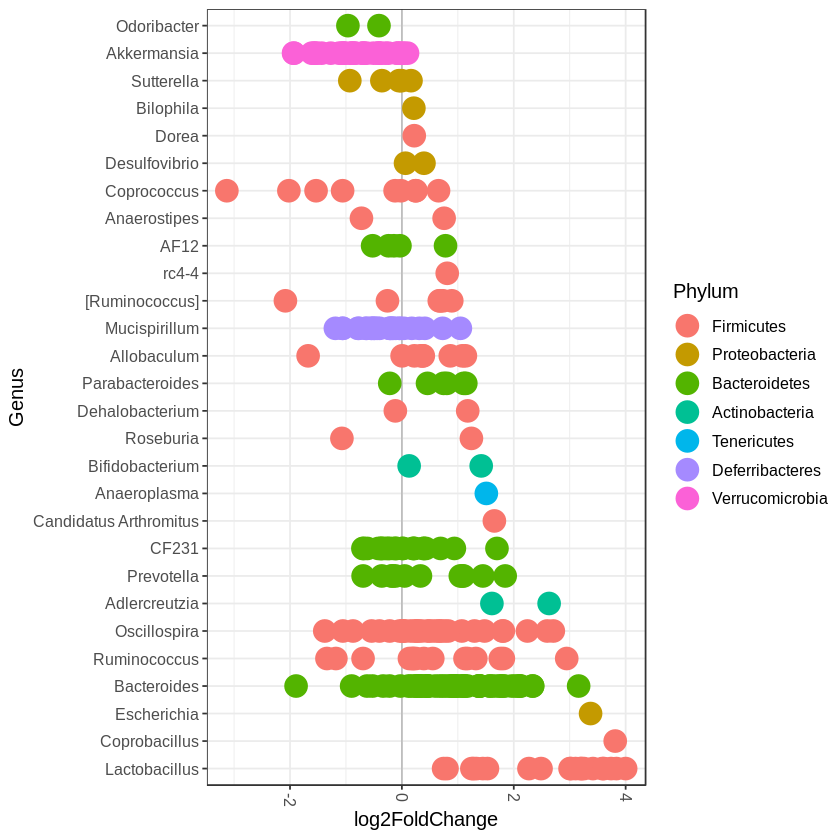

In [24]:
library("ggplot2")
#pdf('BA_Cutoff_PvsCoL_DESEQ.pdf', width=32, height=20)
#jpeg("rplot.jpg", width = 1000, height = 800)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) + 
  theme(text= element_text(size=12),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
dev.off()

# Time 4

In [25]:
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(deseq2.PL.time4), 1, gm_mean)
deseq2.PL.time4 = estimateSizeFactors(deseq2.PL.time4, geoMeans = geoMeans)
deseq2.PL.time4 = DESeq(deseq2.PL.time4, fitType="local")

res = results(deseq2.PL.time4)
res = res[order(res$padj, na.last=NA), ]

sigtab = res
#sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(phy.pt.time4)[rownames(sigtab), ], "matrix"))
sigtab
head(sigtab, contrasts=list("Placebo","Letrozole"))
write.csv(sigtab, "pvl_time4.csv", row.names = TRUE)
res

using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 52 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo298519,38.906362,-3.981480,0.8794679,-4.527146,5.978557e-06,0.003090914,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo17716,4.386235,-4.418673,1.1009072,-4.013665,5.978318e-05,0.015453952,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo78453,2.398239,4.536112,1.1837731,3.831910,1.271524e-04,0.019891683,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo182465,23.918352,3.058014,0.8201017,3.728823,1.923760e-04,0.019891683,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,NA,NA,NA
denovo484653,29.559550,-2.540779,0.6788500,-3.742770,1.820030e-04,0.019891683,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo303151,11.242885,-2.215786,0.6162706,-3.595475,3.238002e-04,0.027900788,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NA,NA,NA
denovo260927,3.939934,3.082796,0.8947414,3.445460,5.700873e-04,0.042105021,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfovibrionales,Desulfovibrionaceae,Desulfovibrio,NA,NA
denovo167717,13.245304,1.875521,0.5816701,3.224373,1.262489e-03,0.059028324,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo105657,7.093540,2.325526,0.7265277,3.200878,1.370097e-03,0.059028324,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NA,NA,NA


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo298519,38.906362,-3.981480,0.8794679,-4.527146,5.978557e-06,0.003090914,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo17716,4.386235,-4.418673,1.1009072,-4.013665,5.978318e-05,0.015453952,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo78453,2.398239,4.536112,1.1837731,3.831910,1.271524e-04,0.019891683,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo182465,23.918352,3.058014,0.8201017,3.728823,1.923760e-04,0.019891683,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Rikenellaceae,NA,NA,NA
denovo484653,29.559550,-2.540779,0.6788500,-3.742770,1.820030e-04,0.019891683,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo303151,11.242885,-2.215786,0.6162706,-3.595475,3.238002e-04,0.027900788,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NA,NA,NA


log2 fold change (MLE): Treat P vs L 
Wald test p-value: Treat P vs L 
DataFrame with 517 rows and 6 columns
               baseMean log2FoldChange     lfcSE         stat       pvalue
              <numeric>      <numeric> <numeric>    <numeric>    <numeric>
denovo298519  38.906362      -3.981480 0.8794679    -4.527146 5.978557e-06
denovo17716    4.386235      -4.418673 1.1009072    -4.013665 5.978318e-05
denovo78453    2.398239       4.536112 1.1837731     3.831910 1.271524e-04
denovo182465  23.918352       3.058014 0.8201017     3.728823 1.923760e-04
denovo484653  29.559550      -2.540779 0.6788500    -3.742770 1.820030e-04
...                 ...            ...       ...          ...          ...
denovo532111   2.128408    0.018647968 0.7381268  0.025263910    0.9798445
denovo181784   5.989719   -0.010061820 0.5474283 -0.018380162    0.9853356
denovo339498   4.522630   -0.007928671 0.6246527 -0.012692926    0.9898728
denovo203818 106.756815   -0.003146696 0.3649593 -0.008622047    0

null device 
          1

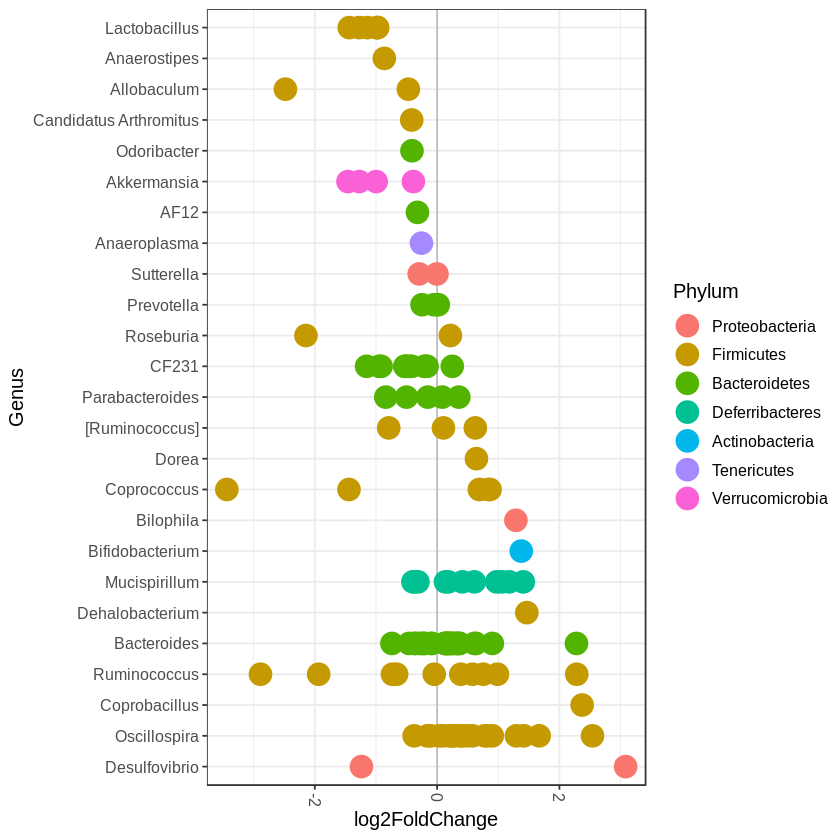

In [26]:
library("ggplot2")
#pdf('BA_Cutoff_PvsCoL_DESEQ.pdf', width=32, height=20)
#jpeg("rplot.jpg", width = 1000, height = 800)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) + 
  theme(text= element_text(size=12),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
dev.off()

# Time 5

In [27]:
gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}
geoMeans = apply(counts(deseq2.PL.time5), 1, gm_mean)
deseq2.PL.time5 = estimateSizeFactors(deseq2.PL.time5, geoMeans = geoMeans)
deseq2.PL.time5 = DESeq(deseq2.PL.time5, fitType="local")

res = results(deseq2.PL.time5)
res = res[order(res$padj, na.last=NA), ]

sigtab = res
#sigtab = res[(res$padj < alpha), ]
sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(phy.pt.time5)[rownames(sigtab), ], "matrix"))
sigtab
head(sigtab, contrasts=list("Placebo","Letrozole"))
write.csv(sigtab, "pvl_time5.csv", row.names = TRUE)
res

using pre-existing size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 80 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo298519,25.288853,-3.321962,0.6907329,-4.809329,1.514376e-06,0.001667328,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo470754,15.111709,4.684393,1.0218400,4.584273,4.555689e-06,0.002507907,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo277613,2.851434,-4.432875,1.0996211,-4.031275,5.547517e-05,0.015814185,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Roseburia,NA,NA
denovo34009,84.848680,3.253705,0.8087694,4.023031,5.745390e-05,0.015814185,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo211707,2.608895,3.420093,0.8969074,3.813207,1.371753e-04,0.025171668,Bacteria,Firmicutes,Erysipelotrichi,Erysipelotrichales,Erysipelotrichaceae,NA,NA,NA
denovo289427,3.591885,3.974706,1.0393715,3.824144,1.312271e-04,0.025171668,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo17716,4.599126,-4.414551,1.1809484,-3.738140,1.853864e-04,0.029158633,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo383875,5.989054,-4.490721,1.2392415,-3.623766,2.903446e-04,0.039958680,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Coprococcus,NA,NA
denovo295047,14.633878,-2.791485,0.8005408,-3.486999,4.884726e-04,0.059756477,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Kingdom,Phylum,Class,Order,Family,Genus,Species,Rank1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
denovo298519,25.288853,-3.321962,0.6907329,-4.809329,1.514376e-06,0.001667328,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo470754,15.111709,4.684393,1.0218400,4.584273,4.555689e-06,0.002507907,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NA,NA,NA
denovo277613,2.851434,-4.432875,1.0996211,-4.031275,5.547517e-05,0.015814185,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Roseburia,NA,NA
denovo34009,84.848680,3.253705,0.8087694,4.023031,5.745390e-05,0.015814185,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA
denovo211707,2.608895,3.420093,0.8969074,3.813207,1.371753e-04,0.025171668,Bacteria,Firmicutes,Erysipelotrichi,Erysipelotrichales,Erysipelotrichaceae,NA,NA,NA
denovo289427,3.591885,3.974706,1.0393715,3.824144,1.312271e-04,0.025171668,Bacteria,Firmicutes,Clostridia,Clostridiales,NA,NA,NA,NA


log2 fold change (MLE): Treat P vs L 
Wald test p-value: Treat P vs L 
DataFrame with 1101 rows and 6 columns
              baseMean log2FoldChange     lfcSE          stat       pvalue
             <numeric>      <numeric> <numeric>     <numeric>    <numeric>
denovo298519 25.288853      -3.321962 0.6907329     -4.809329 1.514376e-06
denovo470754 15.111709       4.684393 1.0218400      4.584273 4.555689e-06
denovo277613  2.851434      -4.432875 1.0996211     -4.031275 5.547517e-05
denovo34009  84.848680       3.253705 0.8087694      4.023031 5.745390e-05
denovo211707  2.608895       3.420093 0.8969074      3.813207 1.371753e-04
...                ...            ...       ...           ...          ...
denovo255204  1.250624   7.175369e-06 0.7308148  9.818313e-06    0.9999922
denovo463989  1.193260  -2.076986e-03 0.8026649 -2.587613e-03    0.9979354
denovo324525 19.216691   1.655327e-04 0.4809334  3.441905e-04    0.9997254
denovo420009  1.582398   3.246161e-03 0.7213160  4.500331e-03    

null device 
          1

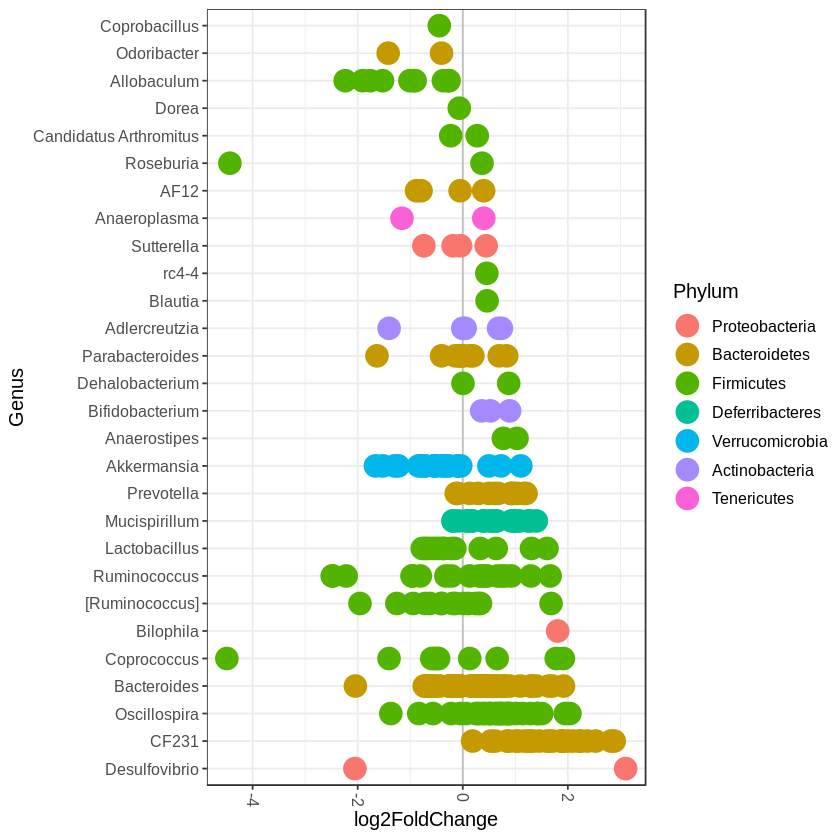

In [28]:
library("ggplot2")
#pdf('BA_Cutoff_PvsCoL_DESEQ.pdf', width=32, height=20)
#jpeg("rplot.jpg", width = 1000, height = 800)
theme_set(theme_bw())
sigtabgen = subset(sigtab, !is.na(Genus))
# Phylum order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Phylum = factor(as.character(sigtabgen$Phylum), levels=names(x))
# Genus order
x = tapply(sigtabgen$log2FoldChange, sigtabgen$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen$Genus = factor(as.character(sigtabgen$Genus), levels=names(x))
ggplot(sigtabgen, aes(y=Genus, x=log2FoldChange, color=Phylum)) + 
  geom_vline(xintercept = 0.0, color = "gray", size = 0.5) +
  geom_point(size=6) + 
  theme(text= element_text(size=12),axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))
dev.off()